### Задание 1
Завершаем практическое задание №2. Необходимо для каждой распознанной фамилии вывести на экран наиболее подходящий вариант из стартового протокола

In [1]:
# !pip install python-levenshtein
import Levenshtein

In [2]:
claim_list = [
    'Шехавцова Анна',
    'Гречихина Наталья',
    'Козлова Алена',
    'Груздева Алина',
    'Кущенко Анна',
    'Чистякова Анастасия'
]

speech_recognition = [
    'кучменко она',
    'кущенко оксана',
    'груздь алина',
    'рычихина наталья',
    'шиховцева на',
    'чистова анастасия'
]

Найдем имена, наиболее близкие по расстоянию Левенштейна

In [3]:
for recognized_name in speech_recognition:
    min_distance_, id_ = None, None
    for i, real_name in enumerate(claim_list):
        lev_dist = Levenshtein.distance(recognized_name, real_name)
        if min_distance_ == None or min_distance_ > lev_dist:
            min_distance_ = lev_dist
            id_ = i
    print('Имя "{}" ближе всего к "{}". Расстояние Левенштейна {} '
          .format(recognized_name, claim_list[id_], min_distance_))

Имя "кучменко она" ближе всего к "Кущенко Анна". Расстояние Левенштейна 5 
Имя "кущенко оксана" ближе всего к "Кущенко Анна". Расстояние Левенштейна 5 
Имя "груздь алина" ближе всего к "Груздева Алина". Расстояние Левенштейна 5 
Имя "рычихина наталья" ближе всего к "Гречихина Наталья". Расстояние Левенштейна 3 
Имя "шиховцева на" ближе всего к "Шехавцова Анна". Расстояние Левенштейна 6 
Имя "чистова анастасия" ближе всего к "Чистякова Анастасия". Расстояние Левенштейна 4 


Сделаем это лаконичнее

In [4]:
for recognized_name in speech_recognition:
    distances = {real_name: Levenshtein.distance(recognized_name, real_name) for real_name in claim_list}
    print('Имя "{}" ближе всего к "{}". Расстояние Левенштейна {} '
          .format(recognized_name, 
                  sorted(distances.items(), key = lambda x: x[1])[0][0], 
                  sorted(distances.items(), key = lambda x: x[1])[0][1]))

Имя "кучменко она" ближе всего к "Кущенко Анна". Расстояние Левенштейна 5 
Имя "кущенко оксана" ближе всего к "Кущенко Анна". Расстояние Левенштейна 5 
Имя "груздь алина" ближе всего к "Груздева Алина". Расстояние Левенштейна 5 
Имя "рычихина наталья" ближе всего к "Гречихина Наталья". Расстояние Левенштейна 3 
Имя "шиховцева на" ближе всего к "Шехавцова Анна". Расстояние Левенштейна 6 
Имя "чистова анастасия" ближе всего к "Чистякова Анастасия". Расстояние Левенштейна 4 


Попробуем добавить коэффициент Жаккара с использованием буква. Вдруг получится 

In [5]:
def countCrossLetters( recognized_name, real_name ):
    recognized_letter_set = set( recognized_name )
    real_letter_set = set( real_name )
    common_letters = recognized_letter_set & real_letter_set
    return len( common_letters ) / len( real_letter_set ) 

In [25]:
for recognized_name in speech_recognition:
    distances = {real_name: Levenshtein.distance(recognized_name, real_name) for real_name in claim_list}
    cross_letters = {real_name: countCrossLetters(recognized_name, real_name) for real_name in claim_list}
    print('Имя "{}" по Левенштейну {} ближе всего к "{}" . А по Жаккару {} ближе всего к "{}"
          .format(recognized_name, 
                  sorted(distances.items(), key = lambda x: x[1])[0][1], 
                  sorted(distances.items(), key = lambda x: x[1])[0][0],
                  sorted(cross_letters.items(), key = lambda x: x[1], reverse=True)[0][1],
                  sorted(cross_letters.items(), key = lambda x: x[1], reverse=True)[0][0]
                 )
         )

SyntaxError: EOL while scanning string literal (<ipython-input-25-07081d5a68d7>, line 4)

Здорово! Стопроцентное совпадение!

### Задание 2

Постройте модель kNN для распознавания цифр. Посчитайте получившееся значение точности (последняя строка в файле 7. kNN digits.ipynb)

In [7]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

Загружаем данные

In [8]:
digits = datasets.load_digits()

In [9]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

Пример первой цифры

In [10]:
digits['data'][0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
digits['data'][0].shape

(64,)

In [12]:
digits['target'].shape #[:20]

(1797,)

Нарисуем пример цифры

In [13]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

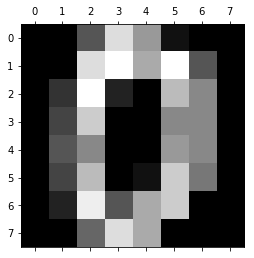

In [14]:
plt.gray()
for i in range(0, 1):
    plt.matshow(digits.images[i])
    
plt.show() 

Признаки и целевая переменная

In [15]:
X_digits = digits.data
Y_digits = digits.target

Количество цифр в данных

In [16]:
n_samples = len( X_digits )

In [17]:
n_samples

1797

Разобьем данные на обучающую выборку и тест в пропорции 90 / 10

In [18]:
split = int( n_samples * .9 )
split

1617

Обучающая выборка

In [19]:
X_train = X_digits[:split]
Y_train = Y_digits[:split]

Формируем тестовую выборку и обучаем модель knn

In [20]:
X_test = X_digits[split:]
Y_test = Y_digits[split:]

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier( n_neighbors = 3 )
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [23]:
knn.score( X_test, Y_test )

0.9666666666666667

In [24]:
for n in range(1,10): 
    knn = KNeighborsClassifier( n_neighbors = n )
    knn.fit(X_train, Y_train)
    print('For {} neighbors score is : {}'.format(n, knn.score( X_test, Y_test )))

For 1 neighbors score is : 0.9666666666666667
For 2 neighbors score is : 0.9777777777777777
For 3 neighbors score is : 0.9666666666666667
For 4 neighbors score is : 0.9666666666666667
For 5 neighbors score is : 0.9611111111111111
For 6 neighbors score is : 0.9611111111111111
For 7 neighbors score is : 0.9611111111111111
For 8 neighbors score is : 0.9611111111111111
For 9 neighbors score is : 0.9611111111111111


Максимальное качество получилось при количестве соседей = 2